In [37]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib as mpl
from scipy import stats
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Загружаем данные 

In [38]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
target = pd.read_csv("Target.csv")
submission = pd.read_csv("Submission.csv")

#### Объединяем тренировочный, тестовый датасеты и колонку, которую нужно предсказать

In [39]:
df = pd.concat([train, test])

In [40]:
df = df.merge(target, how='left')

In [41]:
df.head()

,index,code,year,period,id,Country,population,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,19,EEA_3161-01-1,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.693147
1,20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.218495
2,27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.693147
3,28,EEA_3161-05-5,2009,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.889405
4,49,EEA_3161-01-1,2009,2009-01--2009-12,FRGR0178A,France,122.299437,71176346.0,5.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.510826


 ### Разведывательный анализ данных

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199 entries, 0 to 2198
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2199 non-null   int64  
 1   code             2199 non-null   object 
 2   year             2199 non-null   int64  
 3   period           2199 non-null   object 
 4   id               2199 non-null   object 
 5   Country          2199 non-null   object 
 6   population       2199 non-null   float64
 7   tourists         2199 non-null   float64
 8   venue            2199 non-null   float64
 9   rate             2199 non-null   float64
 10  food             2199 non-null   float64
 11  glass            2199 non-null   float64
 12  metal            2199 non-null   float64
 13  other            2199 non-null   float64
 14  paper            2199 non-null   float64
 15  plastic          2199 non-null   float64
 16  leather          2199 non-null   float64
 17  green_waste   

Рассмотрим категориальный и численные столбцы

In [43]:
cat_column = ["code", "period", "id", "Country"]
num_column = ["year", "population", "tourists", "venue", "rate", "food", "glass", "metal", "other", "paper", "plastic", "leather", "green_waste", "waste_recycling", "polution"]
column_name= cat_column + num_column

#### Анализ числовых признаков

Рассмотрим распределение значений по каждому числовому признаку

In [44]:
df_num = df[num_column]

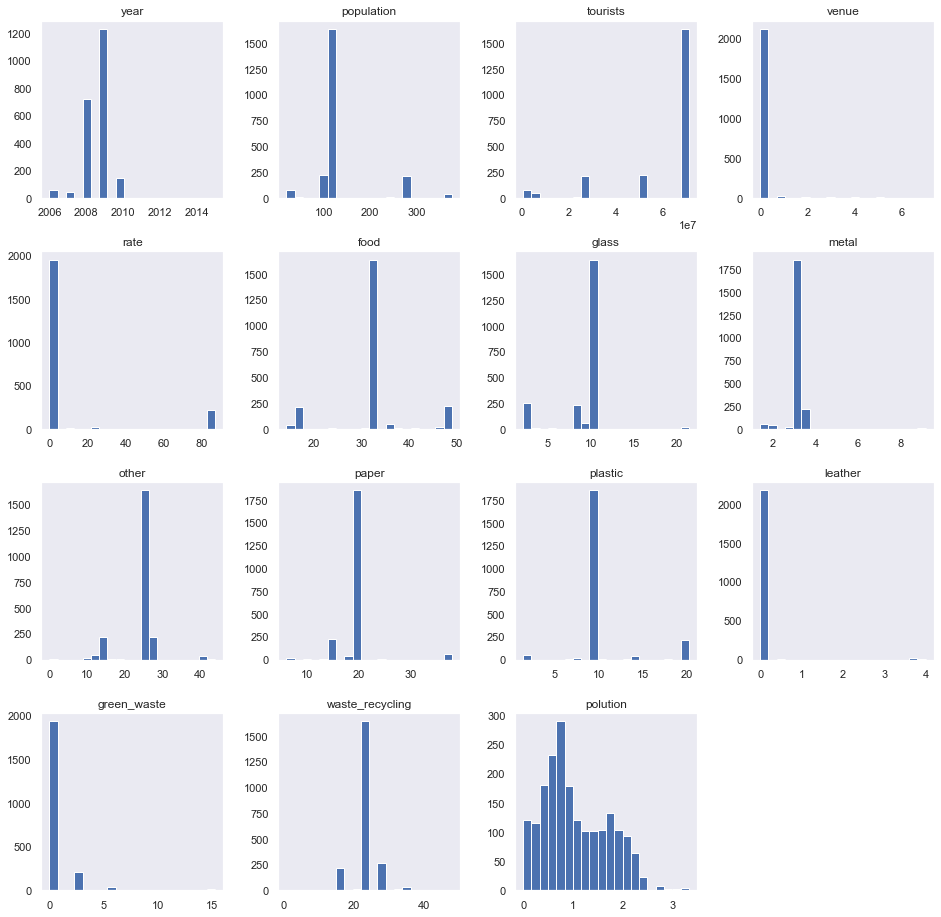

In [45]:
df_num.hist(figsize=(16, 16), bins=20, grid=False);

Рассмотрим признаки "year", "tourists", "polution"

In [46]:
num_column_=["year", "tourists", "polution"]

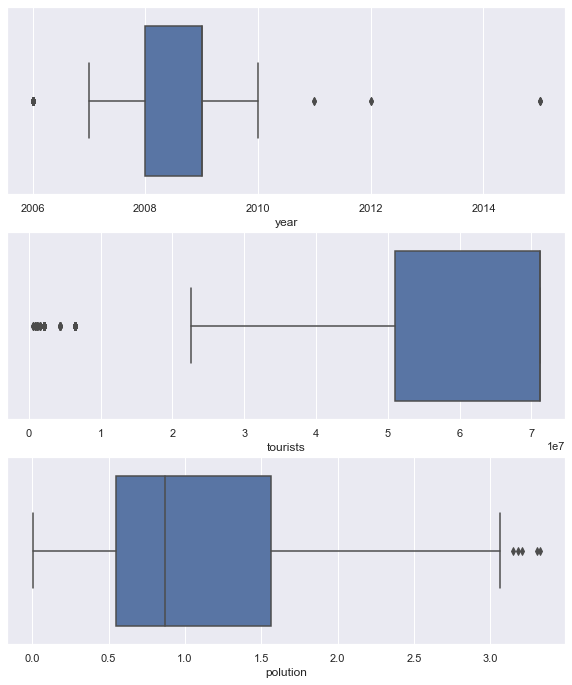

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,20))

for idx, column_name in enumerate(num_column_):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df,
            x=column_name);

Рассмотрим столбец, который необходимо предсказать

In [48]:
df.polution.describe()

count    1979.000000
mean        1.042456
std         0.641893
min         0.002497
25%         0.550070
50%         0.870368
75%         1.561003
max         3.323236
Name: polution, dtype: float64

Text(0, 0.5, '')

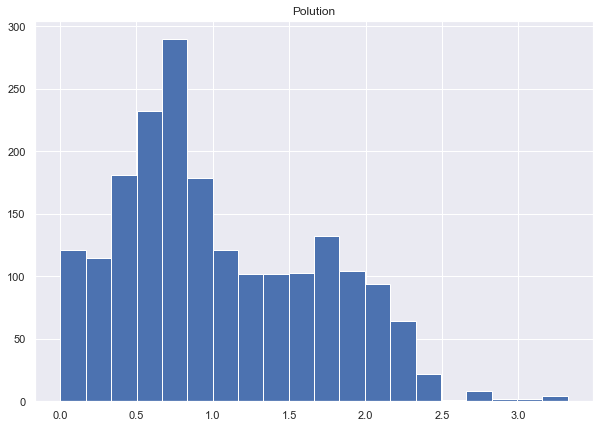

In [49]:
plt.figure(figsize=(10, 7))
plt.hist(df['polution'], bins=20)

plt.title('Polution')
plt.ylabel('')

In [50]:
#рассчитаем среднее медиану и моду
t_mean = round(df['polution'].mean(), 2)
t_median = df['polution'].median()
t_mode = df['polution'].mode()[0]

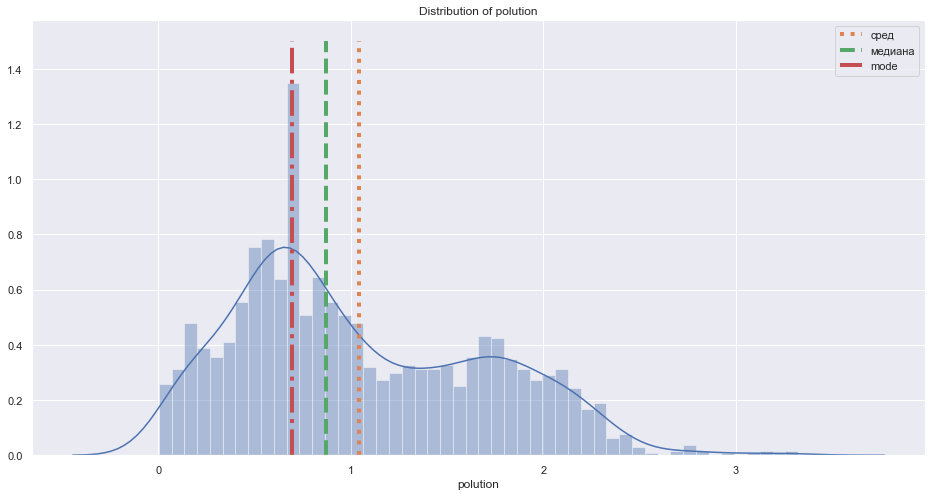

In [51]:
plt.figure(figsize = (16, 8))
sns.distplot(df['polution'], bins=50)

y = np.linspace(0, 1.5, 10)
#строим моду среднее значение и медиану
plt.plot([t_mean] * 10, y, label='сред', linestyle = ":", linewidth=4)
plt.plot([t_median] * 10, y, label='медиана',linestyle = "--",  linewidth=4)
plt.plot([t_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of polution')
plt.legend()
plt.show()

Из графика видно, что среднее значение отклонено в сторону выбросов, в то время как медиана устойчива к выбросам

Посторим boxplot

<AxesSubplot:xlabel='polution'>

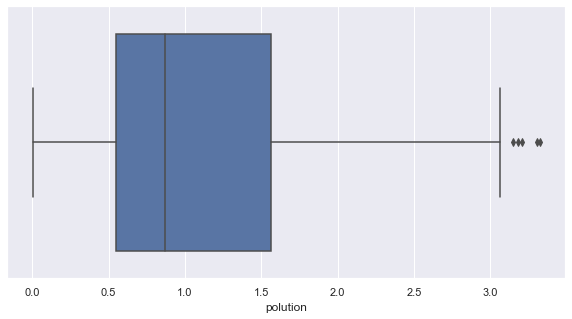

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = df, x ="polution", whis=1.5)

#### Рассмотрим корреляцию между числовыми признаками

<AxesSubplot:>

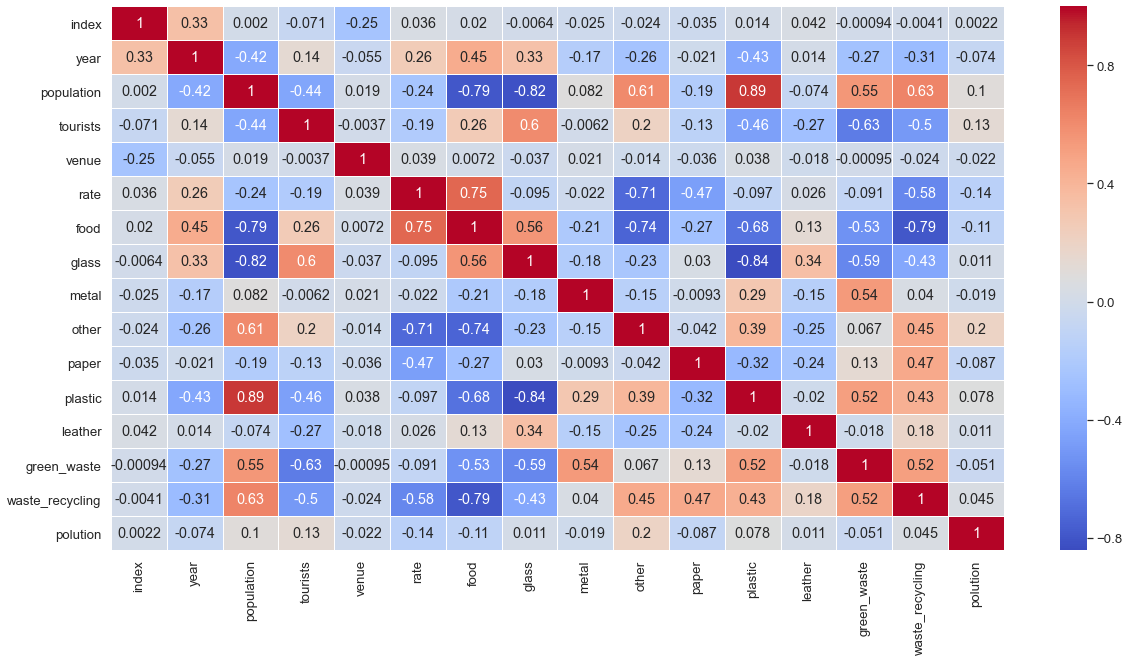

In [53]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

#### Видно, что таргет polution имеет больший коэффициент корреляции со следующими признаками:
waste_recycling
other
food rate population tourists paper

In [54]:
df = df.drop(columns = ["green_waste","metal","leather","glass","plastic", "venue", "year", "index", "paper"], axis = 1)

<AxesSubplot:>

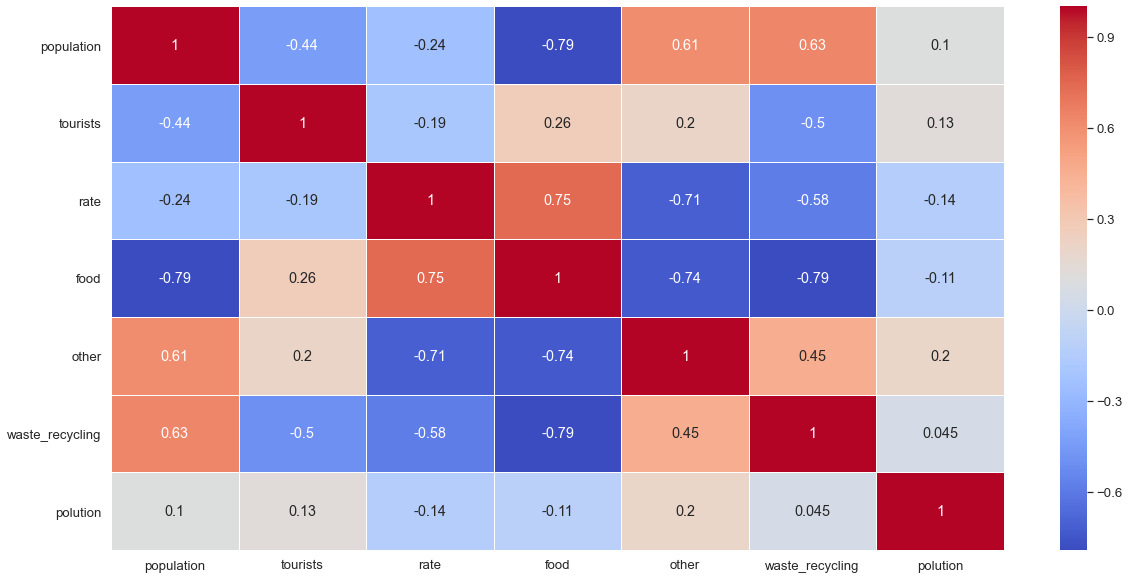

In [55]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

#### Рассмотрим связь признаков друг с другом и с таргетом

In [56]:
def print_(df1,df2):
    grid = sns.jointplot(df1, df2, kind='reg')
    grid.fig.set_figwidth(5)
    grid.fig.set_figheight(5)
    plt.show()

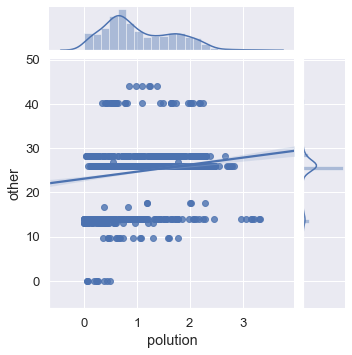

In [57]:
print_(df["polution"], df["other"])

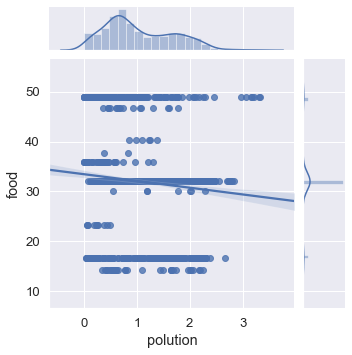

In [58]:
print_(df["polution"], df["food"])

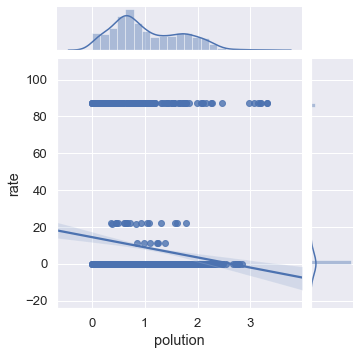

In [59]:
print_(df["polution"], df["rate"])

Наблюдается слабая корреляция между этими признаками и таргетом, однако она есть, и мы будем учитывать данные признаки

#### Связь признаков друг с другом

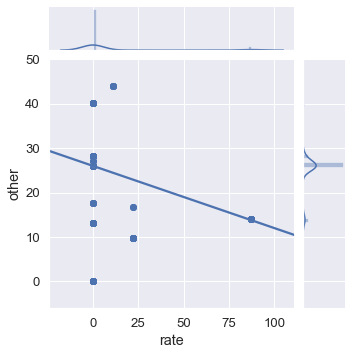

In [60]:
print_(df["rate"], df["other"])

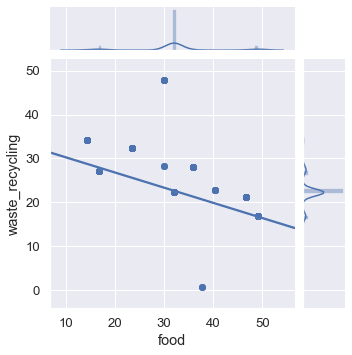

In [61]:
print_(df["food"], df["waste_recycling"])

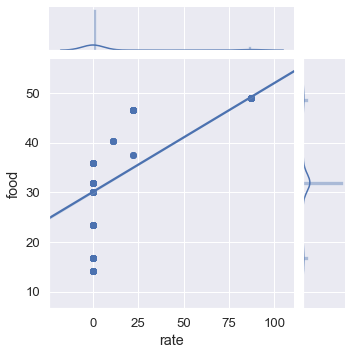

In [62]:
print_(df["rate"], df["food"])

Видим сильную корреляцию между выбранными признаками

### Сделаем one hot encoding категориальных признаков

In [63]:
df.head(3)

,code,period,id,Country,population,tourists,rate,food,other,waste_recycling,polution
0,EEA_3161-01-1,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,0.0,32.0,26.0,22.26,0.693147
1,EEA_3161-05-5,2009-01--2009-12,FRDR179,France,122.299437,71176346.0,0.0,32.0,26.0,22.26,0.218495
2,EEA_3161-01-1,2009-01--2009-12,FRDR174,France,122.299437,71176346.0,0.0,32.0,26.0,22.26,0.693147


In [64]:
df.drop("polution", axis=1, inplace=True)

In [65]:
df = pd.get_dummies(df, columns=["code", "id","period", "Country"])

In [66]:
df

,population,tourists,rate,food,other,waste_recycling,code_EEA_3161-01-1,code_EEA_3161-02-2,code_EEA_3161-03-3,code_EEA_3161-05-5,...,Country_Finland,Country_France,Country_Germany,Country_Latvia,Country_Lithuania,Country_Luxembourg,Country_Serbia,Country_Spain,Country_Sweden,Country_United Kingdom
0,122.299437,71176346.0,0.000000,32.0,26.0,22.26,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,122.299437,71176346.0,0.000000,32.0,26.0,22.26,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,122.299437,71176346.0,0.000000,32.0,26.0,22.26,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,122.299437,71176346.0,0.000000,32.0,26.0,22.26,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,122.299437,71176346.0,0.000000,32.0,26.0,22.26,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,122.299437,71176346.0,0.000000,32.0,26.0,22.26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2195,122.299437,71176346.0,0.000000,32.0,26.0,22.26,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2196,274.708982,25867961.0,0.000000,16.7,28.2,27.25,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2197,93.677197,50941692.0,87.158924,49.0,14.0,16.84,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [67]:
num_column = ["tourists", "other", "population", "rate",  "waste_recycling", "food"]

#### MinMaxScaler для числовых признаков

In [68]:
def get_scale(df,col, model):
    
    scal = model.fit_transform(df[col])
    df[col] = scal
    return df

In [69]:
df = get_scale(df, num_column, MinMaxScaler())

#### Разбиваем обратно на тестовую и тренировочную выборки

In [70]:
train = df.iloc[0:train.shape[0],:]
test = df.iloc[train.shape[0]:,:]

In [71]:
len(test)

220

In [72]:
y_train = target['polution'].values.ravel()

In [73]:
X_train = train.values
X_test = test.values

In [74]:
from sklearn.model_selection import train_test_split
X_train_, X_val, y_train_, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 42)

### Класс Линейной Регрессии

In [75]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        self.n_batches = n_batches
        
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))
    
    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            self.batch_size = y.size
            
        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size
            
        for i in range(self.epochs): 
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)): 

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
                self.weights = self.update() 
                loss += self.loss(yhat,  y_batch)
                
                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches
        
        self.bias = self.weights[0]
    #--------------------------------

    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [76]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + self.l1_penalty + l2_term)

In [77]:
class RidgeRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 n_batches    = None,
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l2_penalty = l2_penalty
        
    #---------------------------------
    def loss(self,yhat, y):   
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term

    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.mean(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)  

#### Обучаем модель и оцениваем точность модели на валидационной выборке

Test Score = 0.66, Train Score = 0.84


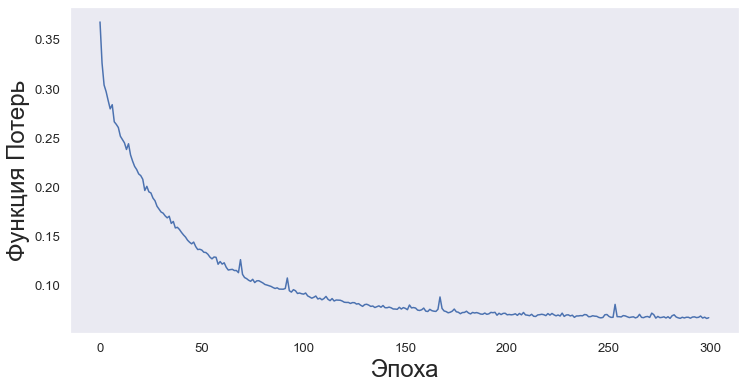

In [78]:
regr_l1l2 = ElasticRegression(learning_rate=0.1,
                         epochs=300,batch_size=45,
                         l1_penalty = 0.0001,l2_penalty = 0.0001 )
regr_l1l2.fit(X_train_, y_train_)

print(f'Test Score = {regr_l1l2.score(X_val, y_val):.2f}, Train Score = {regr_l1l2.score(X_train_, y_train_):.2f}')
regr_l1l2.plot_cost()

Обучим модель на всем тренировочном датасете

In [79]:
regr_l1l2 = ElasticRegression(learning_rate=0.1,
                         epochs=300,batch_size=45,
                         l1_penalty = 0.0001,l2_penalty = 0.0001 )
regr_l1l2.fit(X_train, y_train)

#### Сделаем предсказание на тестовых данных

In [80]:
y_pred = regr_l1l2.predict(X_test)

In [81]:
len(y_pred)

220

In [82]:
submission

,index,polution
0,202,1.086796
1,395,1.086796
2,725,1.086796
3,770,1.086796
4,771,1.086796
...,...,...
215,19438,1.086796
216,19462,1.086796
217,19625,1.086796
218,19690,1.086796


In [83]:
submission['polution'] = y_pred

In [84]:
submission = submission.set_index('index')

In [85]:
submission

,polution
index,
202,1.274080
395,0.820094
725,1.510012
770,1.517114
771,1.312963
...,...
19438,1.880575
19462,1.524186
19625,0.121744


In [ ]:
submission.to_csv('My_Submission_period.csv',index=True)